# PRJPRJNA750263 - Rios et al.

Article link: [https://www.sciencedirect.com/science/article/pii/S2666776221001794](https://www.sciencedirect.com/science/article/pii/S2666776221001794).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJNA750263"
lineages_in_paper <- c("B.1.1.7", "B.1.160", "B.1.177", "B.1.474", "A.27", "B.1.221", "B.1.351", "P.1", "B,1,367")


In [2]:
coco <- read.csv(
    here(
        "data/processed/",
        paste0(prj, "_processed.csv.gz")
    )
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,lat_lon
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,1001,+1002.A,ins:1002:1,0.08462071,4337,367,SRR15275879,2020-11-03,WEST GAMBETTA / NOV 2020 / H / PAE59297_201120 / barcode 08,503,64404711,PRJNA750263,WEST GAMBETTA,43.698 N 7.252 E
2,10059,+10060.T,ins:10060:1,0.06281407,398,25,SRR15275879,2020-11-03,WEST GAMBETTA / NOV 2020 / H / PAE59297_201120 / barcode 08,503,64404711,PRJNA750263,WEST GAMBETTA,43.698 N 7.252 E
3,10065,+10066.A,ins:10066:1,0.09000000,400,36,SRR15275879,2020-11-03,WEST GAMBETTA / NOV 2020 / H / PAE59297_201120 / barcode 08,503,64404711,PRJNA750263,WEST GAMBETTA,43.698 N 7.252 E
4,10160,+10161.T,ins:10161:1,0.01781170,1965,35,SRR15275879,2020-11-03,WEST GAMBETTA / NOV 2020 / H / PAE59297_201120 / barcode 08,503,64404711,PRJNA750263,WEST GAMBETTA,43.698 N 7.252 E
5,1026,+1027.T,ins:1027:1,0.07373150,3784,279,SRR15275879,2020-11-03,WEST GAMBETTA / NOV 2020 / H / PAE59297_201120 / barcode 08,503,64404711,PRJNA750263,WEST GAMBETTA,43.698 N 7.252 E
6,10386,+10387.T,ins:10387:1,0.04531002,2516,114,SRR15275879,2020-11-03,WEST GAMBETTA / NOV 2020 / H / PAE59297_201120 / barcode 08,503,64404711,PRJNA750263,WEST GAMBETTA,43.698 N 7.252 E


In [3]:
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]   8 114

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
 12.906   0.440  13.395 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,lat_lon
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,0.003870088,NA,NA,B.1.1.7,SRR15275879,2020-11-03,WEST GAMBETTA / NOV 2020 / H / PAE59297_201120 / barcode 08,503,64404711,PRJNA750263,WEST GAMBETTA,43.698 N 7.252 E
2,0.103095288,NA,NA,P.1,SRR15275879,2020-11-03,WEST GAMBETTA / NOV 2020 / H / PAE59297_201120 / barcode 08,503,64404711,PRJNA750263,WEST GAMBETTA,43.698 N 7.252 E
3,0.004705114,NA,NA,A.27,SRR15275879,2020-11-03,WEST GAMBETTA / NOV 2020 / H / PAE59297_201120 / barcode 08,503,64404711,PRJNA750263,WEST GAMBETTA,43.698 N 7.252 E
4,0.013878579,NA,NA,B.1.474,SRR15275879,2020-11-03,WEST GAMBETTA / NOV 2020 / H / PAE59297_201120 / barcode 08,503,64404711,PRJNA750263,WEST GAMBETTA,43.698 N 7.252 E
5,0.011461582,NA,NA,B.1.351,SRR15275879,2020-11-03,WEST GAMBETTA / NOV 2020 / H / PAE59297_201120 / barcode 08,503,64404711,PRJNA750263,WEST GAMBETTA,43.698 N 7.252 E
6,0.227367950,NA,NA,B.1.160,SRR15275879,2020-11-03,WEST GAMBETTA / NOV 2020 / H / PAE59297_201120 / barcode 08,503,64404711,PRJNA750263,WEST GAMBETTA,43.698 N 7.252 E


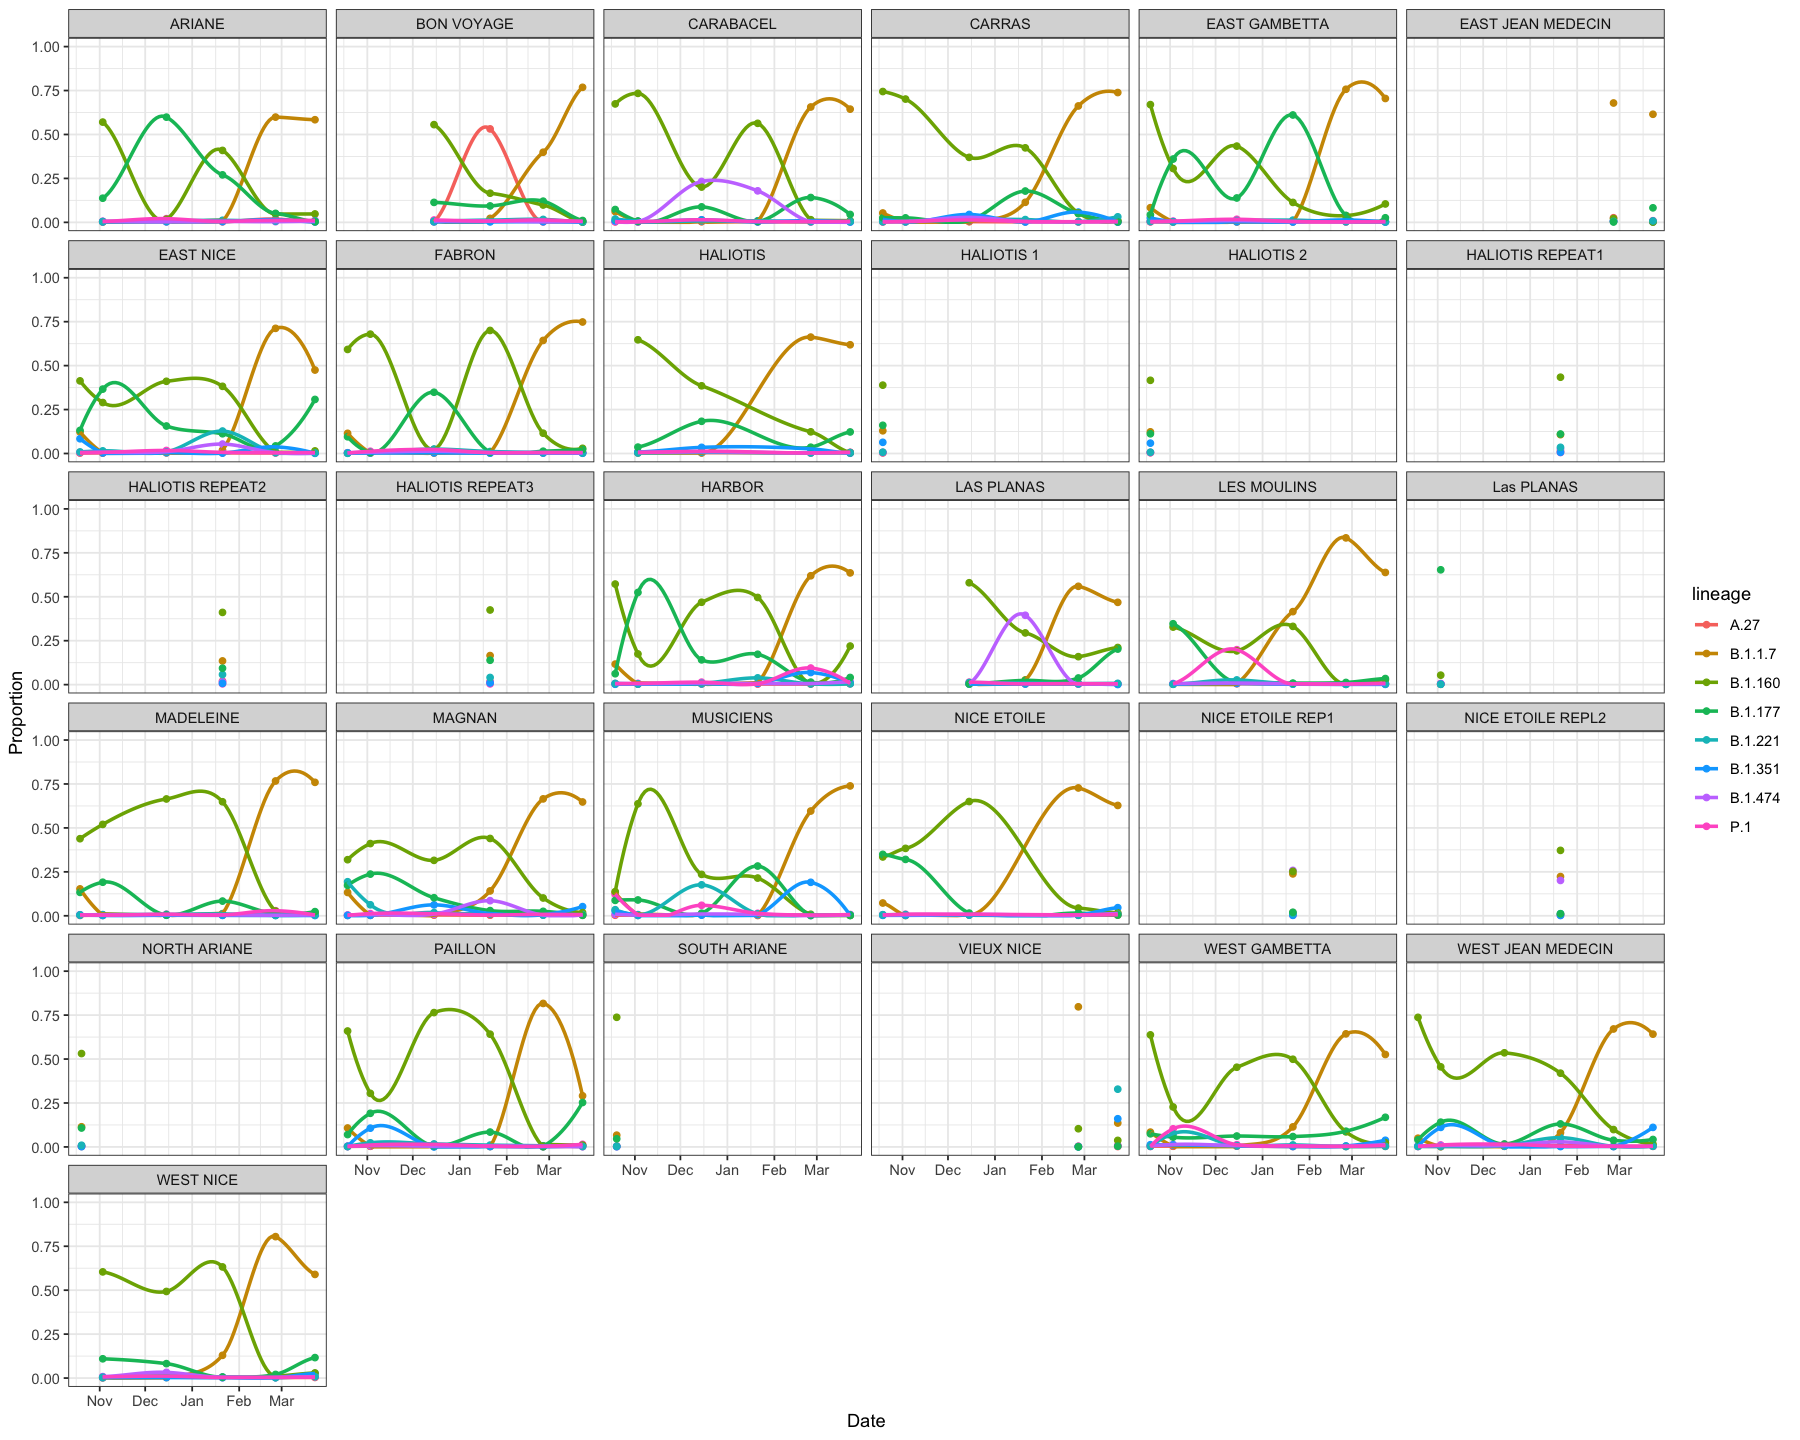

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
